In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
df=pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")


## Columns
<code style="fontsize:1">id</code> unique identifier<br><br>
<code style="fontsize:1">gender</code> "Male", "Female" or "Other"  <br><br>
<code style="fontsize:1">age</code> age of the patient<br><br>
<code style="fontsize:1">hypertension</code> 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font size="1">high blood pressure</font><br><br>
<code style="fontsize:1">heart disease</code>: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br><br>
<code style="fontsize:1">ever_married</code> "No" or "Yes"<br><br>
<code style="fontsize:1">work_type</code> "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br><br>
<code style="fontsize:1">Residence_type</code> "Rural" or "Urban"<br><br>
<code style="fontsize:1">avg_glucose_level</code> average glucose level in blood<br><br>
<code style="fontsize:1">bmi</code>: body mass index<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font size="1">body mass/(body height)^2</font><br><br>
<code style="fontsize:1">smoking_status</code> "formerly smoked", "never smoked", "smokes" or "Unknown"<br><br>
<code style="fontsize:1">stroke</code> 1 if the patient had a stroke or 0 if not<br><br>

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Notes:
1. There are 5110 people in this dataset
2. Age variable is not an integer (should not be a problem)
3. There are people in the dataset who are 0-1 years of age.
    average age is 43 and standard deviation of age is 22. The age range is spread widely in this dataset 
4. BMI has some nan values. 
5. 4.87% of the respondents in the dataset have had a stroke (249 people)
    A model that predicts 0 for stroke all the time will have 95% accuracy on this datset

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Viewing data about stroke patients

In [6]:
df[df['stroke']==1].describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,249.000000,249.000000,249.000000,249.000000,249.000000,209.000000,249.0
mean,37115.068273,67.728193,0.265060,0.188755,132.544739,30.471292,1.0
std,21993.344872,12.727419,0.442254,0.392102,61.921056,6.329452,0.0
min,210.000000,1.320000,0.000000,0.000000,56.110000,16.900000,1.0
25%,17013.000000,59.000000,0.000000,0.000000,79.790000,26.400000,1.0
50%,36706.000000,71.000000,0.000000,0.000000,105.220000,29.700000,1.0
75%,56669.000000,78.000000,1.000000,0.000000,196.710000,33.700000,1.0
max,72918.000000,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


Viewing data from non-stroke patients

In [7]:
df[df['stroke']==0].describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4700.000000,4861.0
mean,36487.236371,41.971545,0.088871,0.047110,104.795513,28.823064,0.0
std,21120.133386,22.291940,0.284586,0.211895,43.846069,7.908287,0.0
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.0
25%,17762.000000,24.000000,0.000000,0.000000,77.120000,23.400000,0.0
50%,36958.000000,43.000000,0.000000,0.000000,91.470000,28.000000,0.0
75%,54497.000000,59.000000,0.000000,0.000000,112.830000,33.100000,0.0
max,72940.000000,82.000000,1.000000,1.000000,267.760000,97.600000,0.0


Notes:
1. Average age for stroke is significantly higher than average age in the dataset.
    67 versus 43
2. There is a 1 year old who has had a stroke.
3. 26.5% of people who had a stroke have hypertension.
4. 8.8% of people who have not had a stroke have hypertension.
5. Stroke chances appear to increase with older individuals and individuals with hypertension.
6. The same can be said for heart disease (4.7% for no stroke, 18.8% for stroke)

Fill all the bmi NaN values with the average bmi grouped by stroke. This choice was made after viewing means and standard deviations in stroke groups. We could also have done this by median.

In [8]:

mean0 = df[df['stroke']==0].bmi.mean()
mean1 = df[df['stroke']==1].bmi.mean()

def fillbmi(x):
    if x['bmi']!=x['bmi']:
        if x['stroke']==0:
            return mean0
        return mean1
    return x['bmi']


df['bmi'] = df.apply(
    lambda x: fillbmi(x),
    axis=1
)

Countplots (bar charts) of categorical variables partitioned by stroke. Kept the y-axis the same across subplots for appropriate visual inspection.

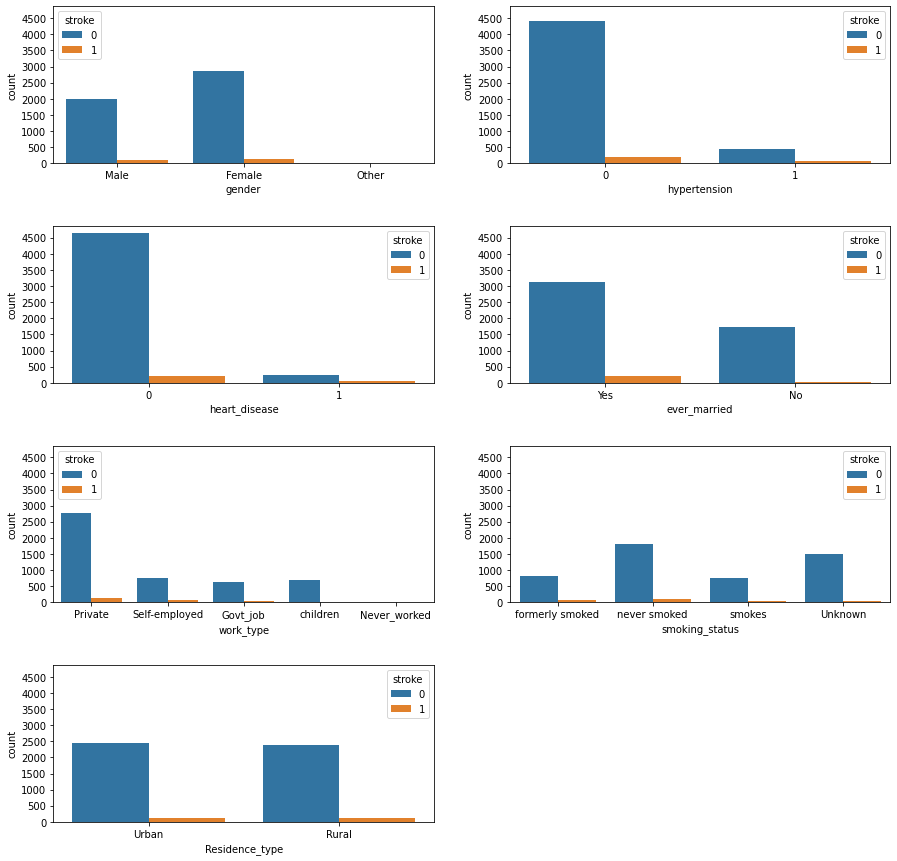

In [9]:
fig, axs = plt.subplots(4,2, figsize=(15,15), sharey=True)

axs[0,0].yaxis.set_ticks(np.arange(0,df.shape[0],500))
sns.countplot(ax=axs[0,0],data=df,x='gender', hue='stroke')


sns.countplot(ax=axs[0,1],data=df,x='hypertension', hue='stroke')
axs[0,1].tick_params(labelleft=True)


sns.countplot(ax=axs[1,0],data=df,x='heart_disease', hue='stroke')


sns.countplot(ax=axs[1,1],data=df,x='ever_married', hue='stroke')
axs[1,1].tick_params(labelleft=True)


sns.countplot(ax=axs[2,0],data=df,x='work_type', hue='stroke')


sns.countplot(ax=axs[2,1],data=df,x='smoking_status', hue='stroke')
axs[2,1].tick_params(labelleft=True)

sns.countplot(ax=axs[3,0],data=df,x='Residence_type', hue='stroke')
axs[3,0].tick_params(labelleft=True)

fig.delaxes(axs[3,1])

plt.subplots_adjust(hspace=0.4)




It appears gender is not a significant indicator of stroke, while heart disease and hypertension may be. Would be more confident in this assumption if there was more data on people with hypertension/heart disease. 

Histogram of continuous variables seprated by stroke

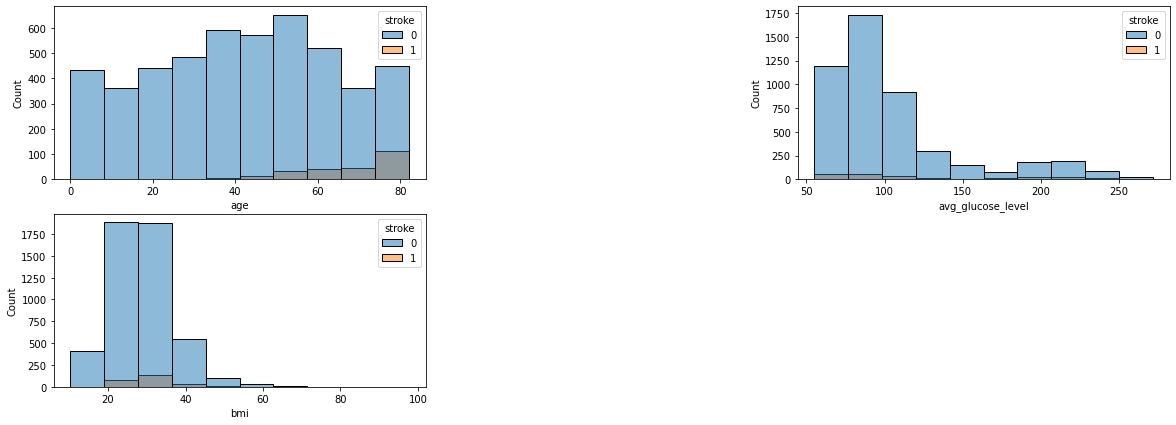

In [10]:
fig = plt.figure(figsize=(20,7))
gs = fig.add_gridspec(2,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
sns.histplot(ax=ax0,data=df,x='age',bins = 10, hue='stroke')
sns.histplot(ax=ax1, data = df, x="avg_glucose_level", bins=10, hue="stroke", alpha = 0.5)
sns.histplot(ax=ax2, data = df, x="bmi", bins=10, hue="stroke", alpha = 0.5)
plt.subplots_adjust(wspace=1.0)

Goal: analyze distribution of age of stroke positives  (249)
    create pie chart that shows distribution of age grouped in created buckets
    ['<20', '20-40', '40-60', '60+']
    
    
Results: 96.8% of stroke patients are over 40. There are 2 stroke patients under 20.

source for code below:
https://stackoverflow.com/questions/23577505/how-to-avoid-overlapping-of-labels-autopct-in-a-matplotlib-pie-chart

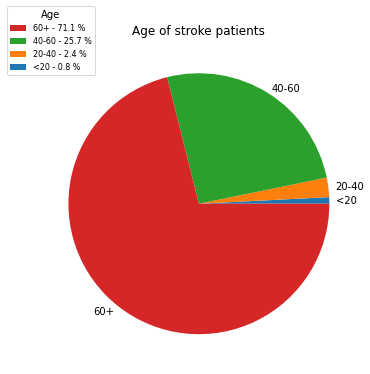

In [11]:

pielabel = ['<20', '20-40', '40-60', '60+']
dfstroke = df[df['stroke']==1]
u20 = dfstroke[dfstroke['age']<20].shape[0]
u40 = dfstroke[(dfstroke['age']>=20) & (dfstroke['age']<=40)].shape[0]
u60 = dfstroke[(dfstroke['age']>40) & (dfstroke['age']<=60)].shape[0]
over = dfstroke[dfstroke['age']>60].shape[0]
sizes = np.array([u20, u40, u60, over])
fig1, ax1 = plt.subplots(figsize=(6,6))
percent = 100.*sizes/sizes.sum()
patches, texts = ax1.pie(sizes, labels = pielabel, labeldistance=1.05)


l = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(pielabel, percent)]
patches, labels, dummy =  zip(*sorted(zip(patches, l, sizes),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.title('Age of stroke patients')

plt.legend(patches, labels, loc='center left', title='Age', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

Inspection of the 1 year old stroke patient

In [12]:
df[(df['stroke']==1) & (df['age']==1.32)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,30.471292,Unknown,1


Correlation matrix of continuous variables

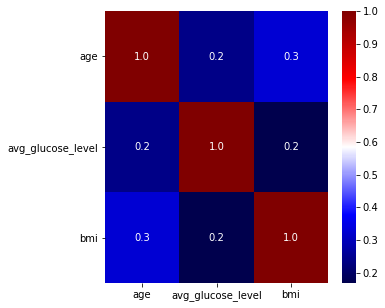

In [13]:
categorical_columns = ['Residence_type','gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'smoking_status']
continuous_columns = [c for c in df.columns if c not in categorical_columns]
continuous_columns.remove('stroke')
continuous_columns.remove('id')

fig = plt.figure(figsize=(5,5))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

df_correlation = df[continuous_columns].corr()
sns.heatmap(df_correlation,fmt=".1f",annot=True,cmap='seismic')
plt.show()

The following is a t-test to determine two assumptions:
1. Ho: Males have the same stroke percentage as females.
2. Ho: Hypertension patients have the same stroke percentage as non-hypertension patients.

Results: from p-values, conclude that stroke percentage of male and female is statistically insignificant while stroke percentage of hypertension and no hypertension is statistically significant. Reject Ho from 2. 

In [14]:
#test whether gender, hypertension are significant determinants of stroke
#h0: proportion of males with stroke == proportion of females with stroke
#h0: proportion of people with hypertension and stroke == proportion of people with no hypertenstion and stroke
from scipy import stats
_,p1 = stats.ttest_ind(df[df['gender']=='Male']['stroke'], df[df['gender']=='Female']['stroke'],equal_var=False)
_,p2 = stats.ttest_ind(df[df['hypertension']==0]['stroke'], df[df['hypertension']==1]['stroke'],equal_var=False)
print(p1)
print(p2)


0.5191685054545454
3.673335722473369e-09


Partition dataset into groups based on age. Analyze stroke/hypertension percentages among the groups. 
<br>
[<40, 40-60,60-80, 80+] 
<br>
<br>
Results:  There are only 186 people over 80 in the dataset yet that group's stroke percentage is 21%. This is nearly 5x the overall stroke percentage in the dataset (4.8%). The overall hypertension dataset percentage is 9.7% and the over 80 hypertension % is 26.8%. The >80 population has high stroke rates, but are underrepresented in the dataset. 186/5110 = 3.6% of the data.


In [15]:
def age_group(row):
    if row['age']<40:
        return '<40'
    elif row['age']<60:
        return '40-60'
    elif row['age']<80:
        return '60-80'
    return '80+'

df['age_group'] = df.apply(lambda x: age_group(x), axis=1)
table = df.groupby('age_group').agg(['count', 'mean'])
reduced_table = table[['stroke','hypertension']]
x = df['stroke'].mean()
reduced_table['stroke_total_mean'] = x
reduced_table['hypertension_total_mean'] = df['hypertension'].mean()
reduced_table = reduced_table.sort_values(by=('stroke','mean'))
reduced_table

stroke           hypertension           stroke_total_mean  \
           count      mean        count      mean                     
age_group                                                             
<40         2170  0.003687         2170  0.017051          0.048728   
40-60       1564  0.038363         1564  0.105499          0.048728   
60-80       1190  0.118487         1190  0.206723          0.048728   
80+          186  0.215054          186  0.268817          0.048728   

          hypertension_total_mean  
                                   
age_group                          
<40                      0.097456  
40-60                    0.097456  
60-80                    0.097456  
80+                      0.097456

Analyze source of hypertension: Notice that married people have high rates of hypertension, but that correlation may be due to age as seen in the box plot. (older patients are more likely to be married)

Text(0.5, 0, 'hypertension')

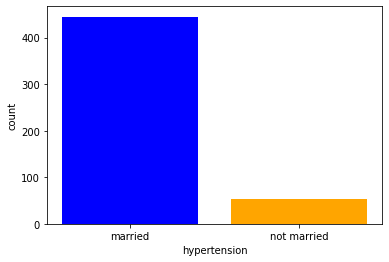

In [16]:

married = df[(df['hypertension']==1) & (df['ever_married']=="Yes")].shape[0]
notmarried = df[(df['hypertension']==1) &(df['ever_married']=="No")].shape[0]
plt.bar(["married", "not married"], [married, notmarried], color=['blue', 'orange'])
plt.ylabel("count")
plt.xlabel("hypertension")



<AxesSubplot:xlabel='hypertension', ylabel='age'>

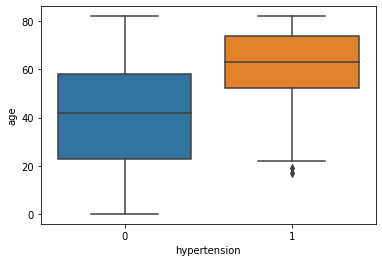

In [17]:
sns.boxplot(data=df, x="hypertension", y="age")


Use Logistic Regression to predict stroke from the dataset
  1. select variables to use for the model
  2. add dummies to categorical variables
  3. split the data into training and test
  4. scale the continuous variables in the training set and use the scaling for test set
  5. run the model
  6. display and analyze confusion matrix
  7. conclusion
  
  

 
  


In [18]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC

In [19]:
df1 = df.copy()

y = df1['stroke']

df1 = df1[categorical_columns+continuous_columns]
df1 = pd.get_dummies(df1, columns = categorical_columns, drop_first = True)

X_train, X_test, y_train, y_test = train_test_split(df1,y, test_size = 0.2, random_state = 13)
print("X_train: ", X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

scaler = preprocessing.StandardScaler().fit(X_train[continuous_columns])
X_train[continuous_columns] = scaler.transform(X_train[continuous_columns]) 
X_test[continuous_columns] = scaler.transform(X_test[continuous_columns]) 



X_train:  (4088, 16)
X_test:  (1022, 16)
y_train:  (4088,)
y_test:  (1022,)


In [20]:
logisticRegr = LogisticRegression(penalty='none')
logisticRegr.fit(X_train, y_train)

predictions = logisticRegr.predict(X_test)

score = logisticRegr.score(X_test, y_test)

pred_train = logisticRegr.predict(X_train)
train_score = logisticRegr.score(X_train, y_train)
print("test score: {}".format(score))
print("train score: {}".format(train_score))

test score: 0.9510763209393346
train score: 0.9515655577299413


In [21]:
cm = metrics.confusion_matrix(y_test, predictions)
cm_train = metrics.confusion_matrix(y_train, pred_train)
print(cm)
print(cm_train)

[[972   0]
 [ 50   0]]
[[3889    0]
 [ 198    1]]


The outputs above are the confusion matrices for the test set and training set. The logistic regression model predicts all negatives (no stroke) in the test set and all but one negative in the training set despite there being 50 positive cases in the test set and 198 positive cases in the training set. 
<br>
Test set:
<br>
The precision of the model: true positive/(true positive + false positive) = 0/0<br>
The recall of the model: true positive/(true positive + false negative) = 0/50 =0

In the case of a stroke, false negatives may be more harmful than false positives. Telling someone they did not have a stroke when they actually  did have one can lead to further unchecked health complications.

Even though the model is accurate on 95% of predictions, it has no predictive power and 0% recall. This is because the logistic regression model (with no regularization) predicts all negative examples except for one in the training set.

The article below provides useful information on confusion matrices, precision, and recall.

https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9







SVM (A more complex model that can learn non-linear relationships between the features and the stroke positive/negative)

In [22]:
def display_cm(classifier, X_train, X_test, y_train, y_test):
#     clf = SVC().fit(X_train,y_train)
    clf = classifier.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    pred_trainsvm = clf.predict(X_train)
    cmsvm = metrics.confusion_matrix(y_test, y_pred)
    cm_trainsvm = metrics.confusion_matrix(y_train, pred_trainsvm)
    s = "SVM accuracy on "+classifier.kernel +" "
    print(s, clf.score(X_test, y_test))
    print(cmsvm)
    print(cm_trainsvm)

In [23]:
display_cm(SVC(kernel='linear'), X_train, X_test, y_train, y_test)

SVM accuracy on linear  0.9510763209393346
[[972   0]
 [ 50   0]]
[[3889    0]
 [ 199    0]]


In [24]:
display_cm(SVC(C=5000), X_train, X_test, y_train, y_test)

SVM accuracy on rbf  0.8992172211350293
[[913  59]
 [ 44   6]]
[[3887    2]
 [  28  171]]


The SVM accuracy on an rbf kernel with very little regularization is 89.9%, which is less accurate than the previous models. However, this model has predictive power because it predicts 65 positives on the test set as opposed to 0 for the previous models. Furthermore, there is an improvement in Precision and Recall scores.<br>
Precision: 6/65 = .09 <br>
Recall: 6/44 = .13 <br>

CONCLUSION: The dataset provides insight into stroke populations, namely the relation between stroke and age and stroke and hypertension. A next step would be to gather more relevant features that can explain stroke as well as more positive examples of stroke. Such features include (more) smoking information, diabetes and race/ethnicity of the individual, all of which are stroke factors according to the CDC
<br><br>
The fact that models predict mostly all negative samples is not indicative of the rarity of stroke occurrences.<br>
According to the CDC, someone in the US has a stroke every 40 seconds, and every 4 minutes a person dies of a stroke.
https://www.cdc.gov/stroke/facts.htm